## Unprocessed Slices of Unique Brains, Alzheimer's detection models

## Set-up

### Libraries

In [ ]:
#run
from google.colab import drive
import os

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from PIL import Image
import imgaug.augmenters as iaa

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow import keras
from tensorflow.keras.utils import to_categorical


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import re
import gc
import random


### Mounting Drive, Unzipping Dataset Locally

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!cp "/content/drive/My Drive/207_Project/oasis.zip" "./"

In [ ]:
#!unzip oasis.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_112.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_113.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_114.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_115.jpg  
  inflating

## Processing Data and Writing images as processed arrays into folder Reshaped Unprocessed Data

In [ ]:
# base_dir = './Data'

# def write_processed_images(category_name, target_range):
#   category_path = os.path.join('./Data', category_name)
#   list_files = os.listdir(category_path)
#   output_folder_path = '/content/drive/My Drive/207_Project/Reshaped_Unprocessed_Data/' + category_name
#   # Create the output folder if it doesn't exist
#   os.makedirs(output_folder_path, exist_ok=True)
#   for i in target_range:
#       filename = list_files[i]
#       if filename.endswith('.jpg'):  # Check for jpg files
#         image_path = os.path.join(category_path, filename)
#         image = np.array(Image.open(image_path).resize((244,122)).rotate(-90, expand=True)) / 255.0
#         output_file_path = os.path.join(output_folder_path, filename[:-4]+'.npy')
#         np.save(output_file_path, image)
#         del image
#         gc.collect()

In [ ]:
# write_processed_images('Mild Dementia', range(0, 5002))

In [ ]:
# write_processed_images('Moderate Dementia', range(0, 488))

In [ ]:
# Create a list of indices using range()
# indices_nod = list(range(0, 67222))
# indices_vmd = list(range(0, 13725))

# # Shuffle the list of indices in place
# random.shuffle(indices_nod)
# random.shuffle(indices_vmd)

# target_range_nod = indices_nod[:8490]
# target_range_vmd = indices_vmd[:3000]

In [ ]:
# took 37 mins to run
# write_processed_images('Non Demented', target_range_nod)

In [ ]:
# write_processed_images('Very mild Dementia', target_range_vmd)

## Loading in Data

### Loading in Data a dictionary with all scans

In [ ]:
# takes 6 min ish to run
# Base directory where the Data folder is located
base_dir = "/content/drive/My Drive/207_Project/Reshaped_Unprocessed_Data"

# Subfolders within the Data folder
categories = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']

# Dictionary to hold arrays, with categories as keys
images = {category: [] for category in categories}

In [ ]:
# 1 to 2 mins
# Loop through Mild Dementia class
category = categories[0]
category_path = os.path.join(base_dir, category)
# Loop through each image in the category's folder
filenames = os.listdir(category_path)
for filename in filenames:
    if filename.endswith('.npy'):  # Check for npy files
        image_path = os.path.join(category_path, filename)
        # Load image into GPU memory
        image = np.load(image_path)
        # Rescale pixel values to fit within [0, 255] range
        image = ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)
        image = tf.convert_to_tensor(image)
        images[category].append(image)
        del image
        tf.keras.backend.clear_session()  # Clear any unused resources
        tf.compat.v1.get_default_graph().finalize()  # Finalize the graph to free up GPU memory

In [ ]:
# 15 secs
# Loop through Moderate Dementia class
category = categories[1]
category_path = os.path.join(base_dir, category)
# Loop through each image in the category's folder
filenames = os.listdir(category_path)
for filename in filenames:
    if filename.endswith('.npy'):  # Check for npy files
        image_path = os.path.join(category_path, filename)
        # Load image into GPU memory
        image = np.load(image_path)
        # Rescale pixel values to fit within [0, 255] range
        image = ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)
        image = tf.convert_to_tensor(image)
        images[category].append(image)
        del image
        tf.keras.backend.clear_session()  # Clear any unused resources
        tf.compat.v1.get_default_graph().finalize()  # Finalize the graph to free up GPU memory

In [ ]:
#7 min
# Loop through Non Demented class
category = categories[2]
category_path = os.path.join(base_dir, category)
# Loop through each image in the category's folder
filenames = os.listdir(category_path)
for filename in filenames:
    if filename.endswith('.npy'):  # Check for npy files
        image_path = os.path.join(category_path, filename)
        # Load image into GPU memory
        image = np.load(image_path)
        # Rescale pixel values to fit within [0, 255] range
        image = ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)
        image = tf.convert_to_tensor(image)
        images[category].append(image)
        del image
        tf.keras.backend.clear_session()  # Clear any unused resources
        tf.compat.v1.get_default_graph().finalize()  # Finalize the graph to free up GPU memory

In [ ]:
# 2 min
# Loop through Very mild Dementia class
category = categories[3]
category_path = os.path.join(base_dir, category)
# Loop through each image in the category's folder
filenames = os.listdir(category_path)
for filename in filenames:
    if filename.endswith('.npy'):  # Check for npy files
        image_path = os.path.join(category_path, filename)
        # Load image into GPU memory
        image = np.load(image_path)
        # Rescale pixel values to fit within [0, 255] range
        image = ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)
        image = tf.convert_to_tensor(image)
        images[category].append(image)
        del image
        tf.keras.backend.clear_session()  # Clear any unused resources
        tf.compat.v1.get_default_graph().finalize()  # Finalize the graph to free up GPU memory

## Exploratory Data Analysis

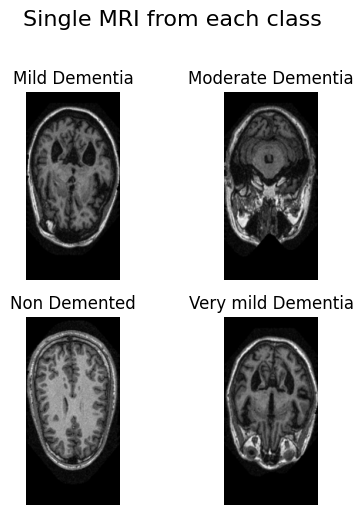

In [ ]:
# DONT RUN THIS CELL
# plot of first brain from each class
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
fig.suptitle('Single MRI from each class', fontsize=16, y=1.02)
for ax, category in zip(axs.flatten(), categories):
    ax.imshow(images[category][0], cmap='gray')
    ax.axis('off')
    ax.set_title(category)
plt.tight_layout()
plt.show()

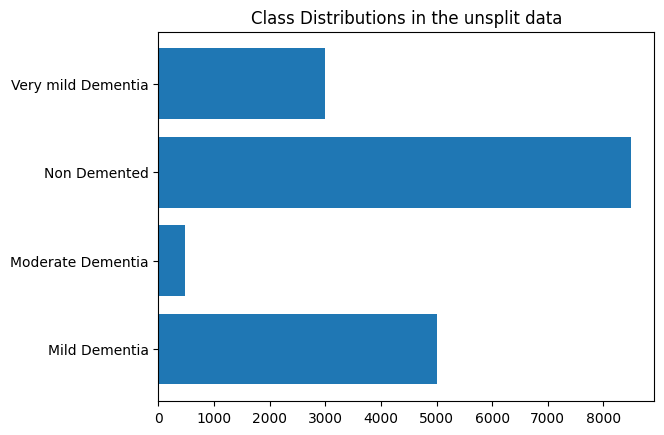

In [ ]:
## DONT RUN

## Demonstrate current class balance
category_sizes = [len(images[category]) for category in categories]
plt.barh(categories, category_sizes, tick_label = categories)
plt.title('Class Distributions in the unsplit data')
plt.show()

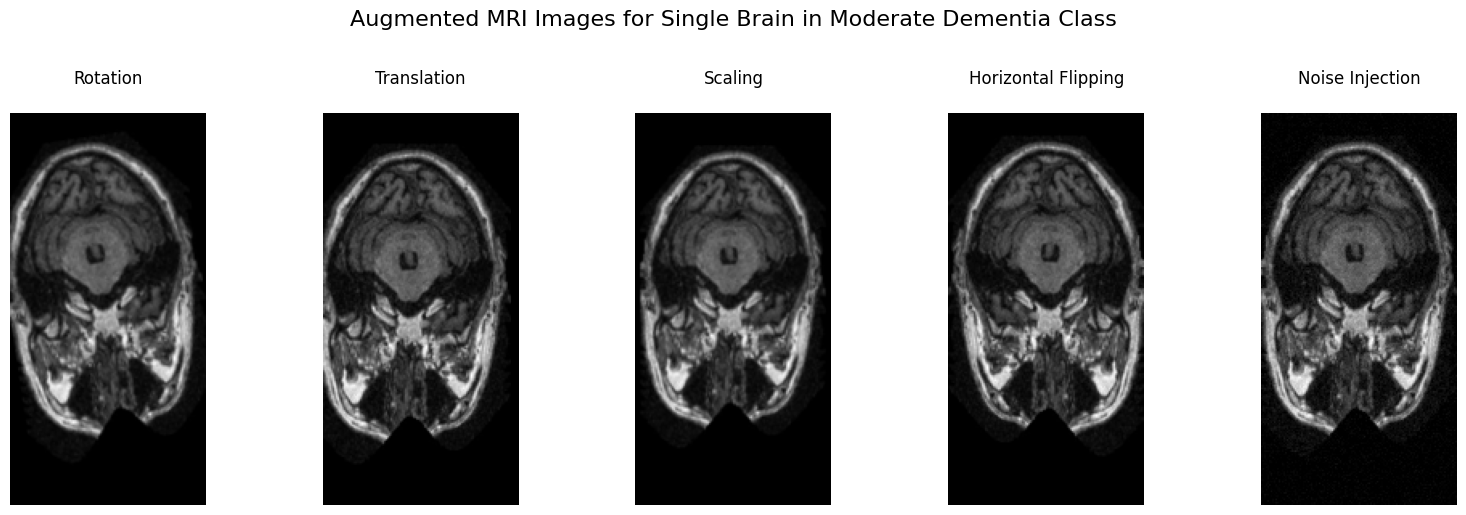

In [ ]:
# plot 5 different augmentations of one brain from the Moderate Dementia class
# Convert the image array to float64 dtype
image = np.array(images['Moderate Dementia'][0], dtype=np.float64)
# Normalize the image array to the range [0, 1]
image_normalized = (image - image.min()) / (image.max() - image.min())
# Scale the normalized image array to uint8 dtype
image_uint8 = (image_normalized * 255).astype(np.uint8)

# Define the augmentations
augmenters = [
    ('Rotation', iaa.Affine(rotate=(-10, 10)), "Helps model to be invariant to slight rotations."),
    ('Translation', iaa.Affine(translate_px={"x": (-5, 5), "y": (-5, 5)}), "Helps model to handle slight translations."),
    ('Scaling', iaa.Affine(scale=(0.9, 1.1)), "Helps model to generalize to different brain sizes."),
    ('Horizontal Flipping', iaa.Fliplr(1.0), "Can make the model more robust if condition isn't hemisphere-specific."),
    ('Noise Injection', iaa.AdditiveGaussianNoise(scale=0.02*255), "Simulates MRI scanner noise."),
]

fig, axs = plt.subplots(1, 5, figsize=(16, 5))
fig.suptitle('Augmented MRI Images for Single Brain in Moderate Dementia Class', fontsize=16, y=1.02)
for ax, (title, augmenter, benefit) in zip(axs.flatten(), augmenters):
    # Apply the augmentation
    augmented_image = augmenter.augment_image(image_uint8)
    # Plot the augmented image
    ax.imshow(augmented_image) #, cmap='gray')
    ax.axis('off')
    ax.set_title(f"{title}\n")
plt.tight_layout()
plt.show()

## Data Preprocessing

### Initialize X and y arrays
Note: here we will merge `Mild Dementia` and `Moderate Dementia` classes to create new `Dementia` class, and merge `Non Demented` and `Very mild Dementia` classes to create new `No Dementia` class.

In [ ]:
## merge classes to create only 2 y classes whilst creating X and y vectors

In [ ]:
len_D_class = len(images['Mild Dementia'])+len(images['Moderate Dementia'])+len(images['Very mild Dementia'])
len_ND_class = len(images['Non Demented'])

print(len_D_class)
print(len_ND_class)

8490
8490


In [ ]:
X = images['Mild Dementia'] + images['Moderate Dementia'] + images['Very mild Dementia'] + images['Non Demented']
y = len_D_class*['Dementia'] + len_ND_class*['No Dementia']

In [ ]:
X[0].shape

TensorShape([244, 122, 3])

### Train, validation, test split

In [ ]:
def split_data(X, y, split):
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator
    tf.random.set_seed(1234)
    np.random.seed(1234)

    # shuffle data
    # FILL IN CODE HERE #
    indices = np.arange(len(X))
    shuffled_indices = np.random.permutation(indices)
    images = pd.Series(X)[shuffled_indices]
    labels = pd.Series(y)[shuffled_indices]

    # create data splits
    # FILL IN CODE HERE #
    N = len(images)
    split_1 = int(split[0]*N)
    split_2 = int((split[0] + split[1])*N)

    X_train = images[:split_1]
    y_train = labels[:split_1]

    X_val = images[split_1:split_2]
    y_val = labels[split_1:split_2]

    X_test = images[split_2:]
    y_test = labels[split_2:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, [0.6, 0.2, 0.2])

In [ ]:
## creating numeric versions of the y vectors
label_mapping = {'No Dementia': 0, 'Dementia': 1}

# Convert string labels to numerical values using the mapping
y_train_numeric = [label_mapping[label] for label in y_train]
y_val_numeric = [label_mapping[label] for label in y_val]
y_test_numeric = [label_mapping[label] for label in y_test]

In [ ]:
# Convert y_val_numeric and y_test_numeric to NumPy arrays if they are not already
y_val_numpy = np.array(y_val_numeric).astype(np.float32)
y_test_numpy = np.array(y_test_numeric).astype(np.float32)

In [ ]:
# Convert validation and test data to NumPy arrays
X_val_numpy = np.array(X_val.tolist())
X_test_numpy = np.array(X_test.tolist())

# Convert y_val_numeric and y_test_numeric to NumPy arrays if they are not already
#y_val_numpy = np.array(y_val_numeric).astype(np.float32)
#y_test_numpy = np.array(y_test_numeric).astype(np.float32)

## ensure types and sizes are correct for model

In [ ]:
# Print shapes
print('Shape of train images: ', X_train.shape)
print('Shape of train labels: ', y_train.shape)

print('\nShape of val images: ', X_val.shape)
print('Shape of train labels: ', y_val.shape)

print('\nShape of test images: ', X_test.shape)
print('Shape of test labels: ', y_test.shape)

print('\nShape of val images: ', X_val_numpy.shape)
print('Shape of train labels: ', y_val_numpy.shape)

print('\nShape of test images: ', X_test_numpy.shape)
print('Shape of test labels: ', y_test_numpy.shape)

Shape of train images:  (10188,)
Shape of train labels:  (10188,)

Shape of val images:  (3396,)
Shape of train labels:  (3396,)

Shape of test images:  (3396,)
Shape of test labels:  (3396,)

Shape of val images:  (3396, 244, 122, 3)
Shape of train labels:  (3396,)

Shape of test images:  (3396, 244, 122, 3)
Shape of test labels:  (3396,)


### Class balancing

In [ ]:
## demonstrate current class balance of training set

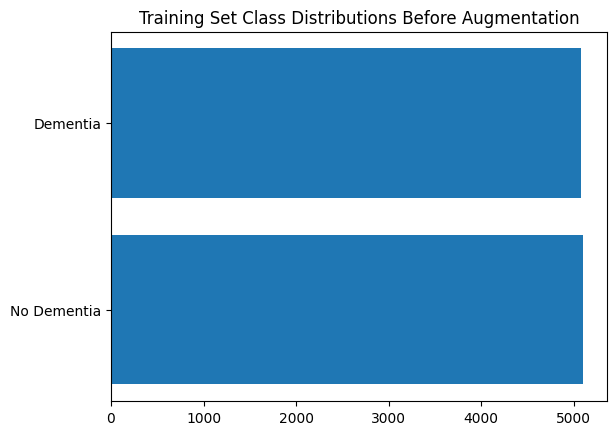

In [ ]:
train_class_counts1 = pd.Series(y_train).value_counts()
plt.barh(train_class_counts1.index, train_class_counts1.values, tick_label = ['No Dementia', 'Dementia'])
plt.title('Training Set Class Distributions Before Augmentation')
plt.show()

In [ ]:
## augment the data

In [ ]:
def rand_augment(augmenters, x):
    # Convert TensorFlow tensor to numpy array
    x_numpy = x.numpy()

    # Helper function to choose a random augmenter out of the possible augmenters to apply to image x
    idx = np.random.randint(len(augmenters))
    augmenter = augmenters[idx][1]

    # Augment numpy array
    augmented_image_numpy = augmenter.augment_image(x_numpy)

    # Convert augmented numpy array back to TensorFlow tensor
    augmented_image = tf.convert_to_tensor(augmented_image_numpy)

    return augmented_image

In [ ]:
X_train_sorted = np.array(X_train)[np.argsort(y_train_numeric)]
X_train_class_sizes = {0: len(y_train)-sum(y_train_numeric), 1: sum(y_train_numeric)}
class0_X_train = X_train_sorted[:X_train_class_sizes[0]].tolist()
class1_X_train = X_train_sorted[X_train_class_sizes[0]:].tolist()

In [ ]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [ ]:
# Define the augmentations
augmenters = [
    ('Rotation', iaa.Affine(rotate=(-10, 10)), "Helps model to be invariant to slight rotations."),
    ('Translation', iaa.Affine(translate_px={"x": (-5, 5), "y": (-5, 5)}), "Helps model to handle slight translations."),
    ('Scaling', iaa.Affine(scale=(0.9, 1.1)), "Helps model to generalize to different brain sizes."),
    ('Horizontal Flipping', iaa.Fliplr(1.0), "Can make the model more robust if condition isn't hemisphere-specific."),
    ('Noise Injection', iaa.AdditiveGaussianNoise(scale=0.02*255), "Simulates MRI scanner noise."),
]

In [ ]:
# Assuming rand_augment function is defined somewhere else in your code

target_size = 6000

while len(class0_X_train) < target_size:
    random_index = np.random.randint(0, len(class0_X_train))
    random_image = class0_X_train[random_index]
    random_image_uint8 = random_image.astype(np.uint8)
    augmented_image = rand_augment(augmenters, random_image_uint8)

    # Reshape augmented image if it has more dimensions than the original
    if len(augmented_image.shape) > len(random_image.shape):
        augmented_image = augmented_image.squeeze()

    class0_X_train.append(augmented_image)

while len(class1_X_train) < target_size:
    random_index = np.random.randint(0, len(class1_X_train))
    random_image = class1_X_train[random_index]
    random_image_uint8 = random_image.astype(np.uint8)
    augmented_image = rand_augment(augmenters, random_image_uint8)

    # Reshape augmented image if it has more dimensions than the original
    if len(augmented_image.shape) > len(random_image.shape):
        augmented_image = augmented_image.squeeze()

    class1_X_train.append(augmented_image)


In [ ]:
X_train_augment = class0_X_train + class1_X_train
y_train_augment = target_size*[0] + target_size*[1]

In [ ]:
# Convert training data to TensorFlow tensors if they are not already
X_train_augment = tf.convert_to_tensor(X_train_augment)
y_train_augment = tf.convert_to_tensor(y_train_augment)

In [ ]:
## demonstrate class balance of training set after adding augmented images

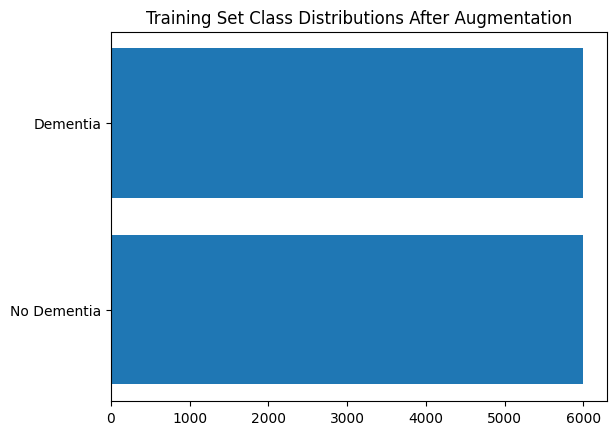

In [ ]:
train_class_counts2 = pd.Series(y_train_augment).value_counts()
plt.barh(train_class_counts2.index, train_class_counts2.values, tick_label = ['No Dementia', 'Dementia'])
plt.title('Training Set Class Distributions After Augmentation')
plt.show()

## Modeling

### Simple Baseline Logistic Regression Model

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Define logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train_augment.shape[1:]),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
print("X_train_augment shape:", X_train_augment.shape)
print("X_val_numpy shape:", X_val_numpy.shape)
print("X_test_numpy shape:", X_test_numpy.shape)
print("Expected input shape for the model:", model.input_shape)

X_train_augment shape: (12000, 244, 122, 3)
X_val_numpy shape: (3396, 244, 122, 3)
X_test_numpy shape: (3397, 244, 122, 3)
Expected input shape for the model: (None, 244, 122, 3)


In [ ]:
# Train the model
history = model.fit(
                    X_train_augment,
                    y_train_augment,
                    epochs=1,
                    batch_size=100,
                    validation_data=(X_val_numpy, y_val_numpy))

120/120 [==============================] - 64s 534ms/step - loss: 216.9320 - accuracy: 0.6823 - val_loss: 15.1491 - val_accuracy: 0.8157


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_numpy, y_test_numpy)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

107/107 [==============================] - 0s 4ms/step - loss: 14.4625 - accuracy: 0.8193
Test Loss: 14.4625, Test Accuracy: 0.8193


107/107 [==============================] - 0s 4ms/step


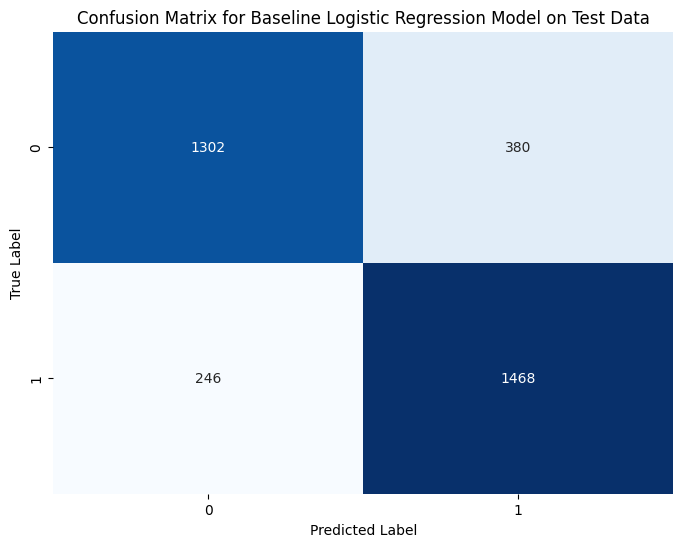

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_val_numpy)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_val_numpy, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Baseline Logistic Regression Model on Test Data')
plt.show()

### Advanced Logistic Regression Model

In [ ]:
def build_advanced_lr(n_classes, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        units=n_classes,
        activation='sigmoid'
    ))

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=learning_rate,
        decay_steps=1000,
        decay_rate=0.96,
        staircase=True)

    optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

lr_model_adv = build_advanced_lr(2, 0.01)

In [ ]:
lr_history_adv = lr_model_adv.fit(X_train_augment, y_train_augment, epochs=20, validation_data=(X_val_numpy, y_val_numpy))

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 393527.2188 - accuracy: 0.7064 - val_loss: 232371.4688 - val_accuracy: 0.7588
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 168634.1719 - accuracy: 0.7922 - val_loss: 83601.7031 - val_accuracy: 0.8525
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 199479.4531 - accuracy: 0.7949 - val_loss: 249936.0938 - val_accuracy: 0.7724
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 143986.8594 - accuracy: 0.8288 - val_loss: 302458.1250 - val_accuracy: 0.7282
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 122178.6172 - accuracy: 0.8397 - val_loss: 80021.2188 - val_accuracy: 0.8787
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 141244.7500 - accuracy: 0.8367 - val_loss: 96780.3516 - val_accuracy: 0.8772
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 111660.4375 - acc

In [ ]:
lr_adv_test_loss, lr_adv_test_acc = lr_model_adv.evaluate(X_test_numpy, y_test_numpy)
print(f"Test accuracy: {lr_adv_test_acc}, Test loss: {lr_adv_test_loss}")

107/107 [==============================] - 0s 4ms/step - loss: 53182.6562 - accuracy: 0.9111
Test accuracy: 0.9110718369483948, Test loss: 53182.65625


In [ ]:
lr_adv_predictions = lr_model_adv.predict(X_test_numpy)
lr_adv_predicted_classes = np.argmax(lr_adv_predictions, axis=1)

107/107 [==============================] - 0s 3ms/step


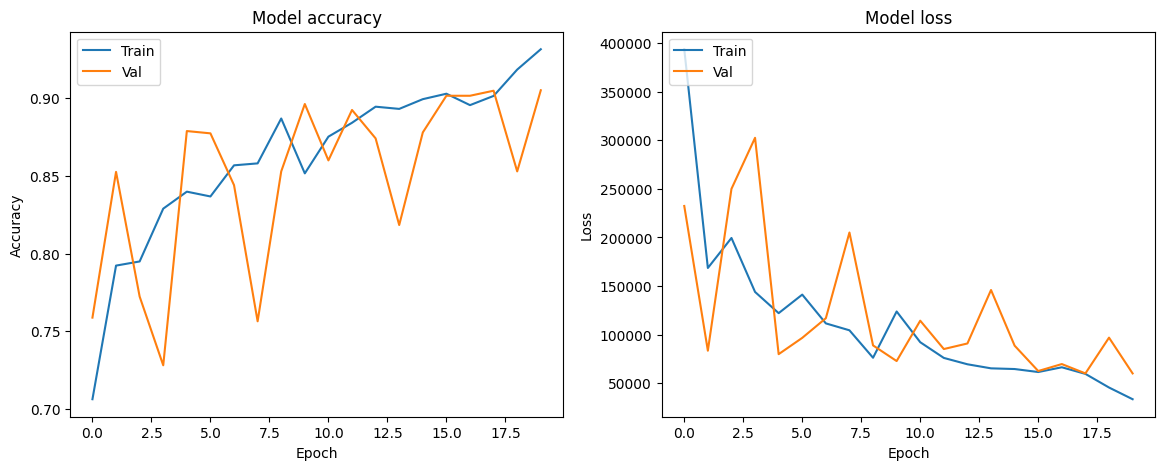

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(lr_history_adv.history['accuracy'])
plt.plot(lr_history_adv.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(lr_history_adv.history['loss'])
plt.plot(lr_history_adv.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

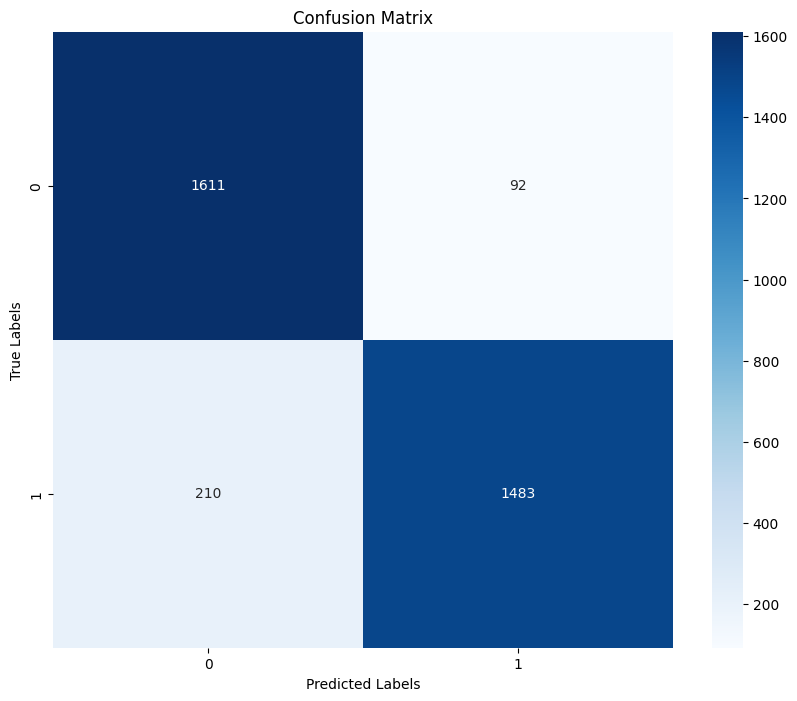

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test_numpy, lr_adv_predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Simple Baseline CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
input_shape = (244, 122, 3)

def build_custom_cnn(input_shape):
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = build_custom_cnn(input_shape)

In [ ]:
history = model.fit(X_train_augment, y_train_augment, epochs=3, validation_data=(X_val_numpy, y_val_numpy))

Epoch 1/3
375/375 [==============================] - 15s 34ms/step - loss: 6.5399 - accuracy: 0.6878 - val_loss: 0.4369 - val_accuracy: 0.7942
Epoch 2/3
375/375 [==============================] - 12s 31ms/step - loss: 0.3475 - accuracy: 0.8504 - val_loss: 0.2281 - val_accuracy: 0.9090
Epoch 3/3
375/375 [==============================] - 11s 30ms/step - loss: 0.1924 - accuracy: 0.9286 - val_loss: 0.1484 - val_accuracy: 0.9423


In [ ]:
model_save_path = "/content/drive/My Drive/207_Project/Oasis_2D_Models/baseline_CNN.h5"

# Save the model in the TensorFlow SavedModel format
model.save(model_save_path)

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the model from Google Drive
# loaded_model = load_model(model_save_path)

In [ ]:
test_loss, test_acc = model.evaluate(X_test_numpy, y_test_numpy)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

107/107 [==============================] - 1s 10ms/step - loss: 0.1340 - accuracy: 0.9464
Test accuracy: 0.9464075565338135, Test loss: 0.13403645157814026


In [ ]:
predictions = model.predict(X_test_numpy)
predicted_classes = np.argmax(predictions, axis=1)

107/107 [==============================] - 1s 9ms/step


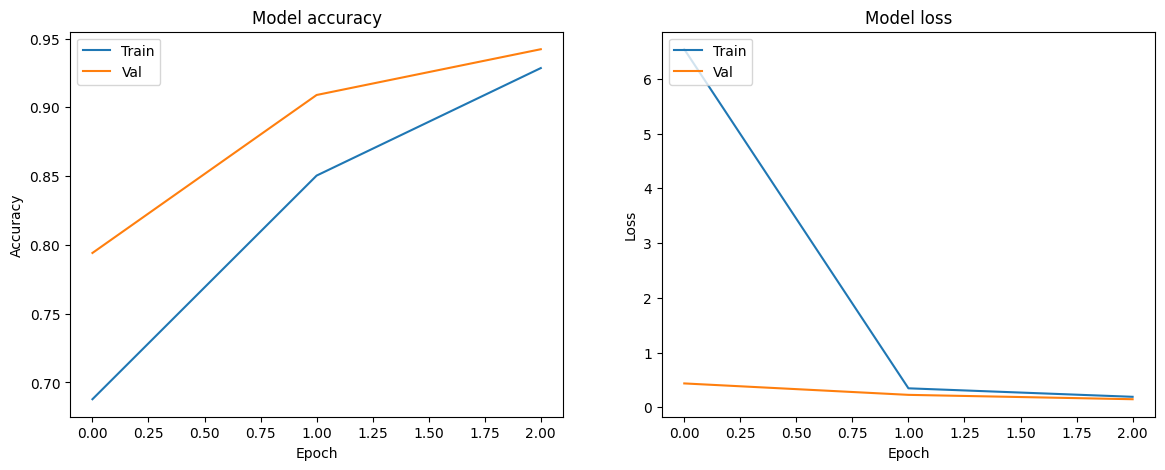

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

107/107 [==============================] - 1s 8ms/step


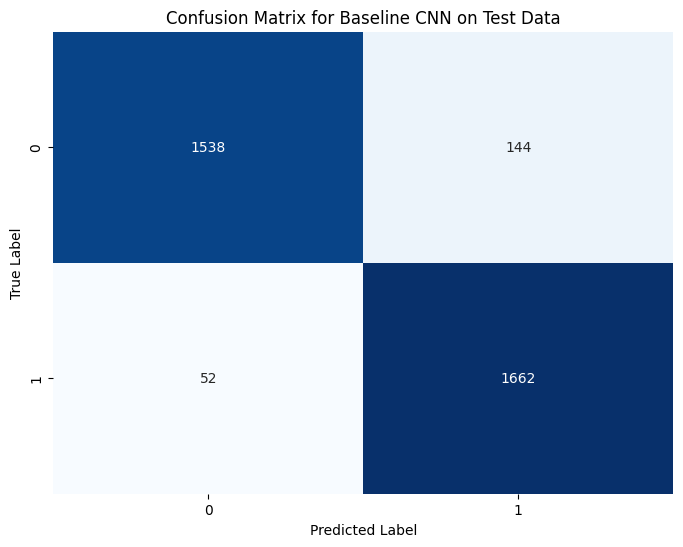

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_val_numpy)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_val_numpy, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Baseline CNN on Test Data')
plt.show()

### Advanced CNN Model

In [ ]:
from tensorflow.keras import optimizers

input_shape = (244, 122, 3)

def build_custom_cnn(input_shape):
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(128, (3, 3), activation='relu'),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=optimizers.Adam(learning_rate = 0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = build_custom_cnn(input_shape)

In [ ]:
history = model.fit(X_train_augment, y_train_augment, epochs=5, validation_data=(X_val_numpy, y_val_numpy))

Epoch 1/5
375/375 [==============================] - 21s 46ms/step - loss: 2.5210 - accuracy: 0.8120 - val_loss: 0.2010 - val_accuracy: 0.9202
Epoch 2/5
375/375 [==============================] - 16s 44ms/step - loss: 0.1563 - accuracy: 0.9374 - val_loss: 0.0957 - val_accuracy: 0.9717
Epoch 3/5
375/375 [==============================] - 16s 44ms/step - loss: 0.0777 - accuracy: 0.9726 - val_loss: 0.0645 - val_accuracy: 0.9803
Epoch 4/5
375/375 [==============================] - 16s 44ms/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.0564 - val_accuracy: 0.9812
Epoch 5/5
375/375 [==============================] - 17s 44ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0533 - val_accuracy: 0.9838


In [ ]:
model_save_path = "/content/drive/My Drive/207_Project/Oasis_2D_Models/advanced_CNN.h5"

# Save the model in the TensorFlow SavedModel format
model.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# from tensorflow.keras.models import load_model

# # Load the model from Google Drive
# loaded_model = load_model(model_save_path)

In [ ]:
test_loss, test_acc = model.evaluate(X_test_numpy, y_test_numpy)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

107/107 [==============================] - 1s 10ms/step - loss: 0.0375 - accuracy: 0.9862
Test accuracy: 0.986160159111023, Test loss: 0.03749974071979523


In [ ]:
predictions = model.predict(X_test_numpy)
predicted_classes = np.argmax(predictions, axis=1)

107/107 [==============================] - 1s 8ms/step


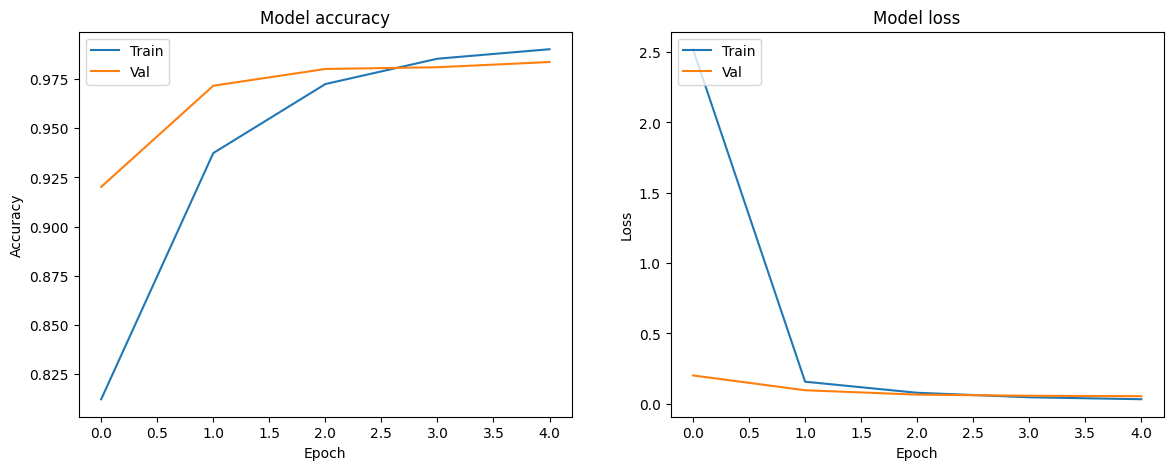

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

107/107 [==============================] - 1s 10ms/step


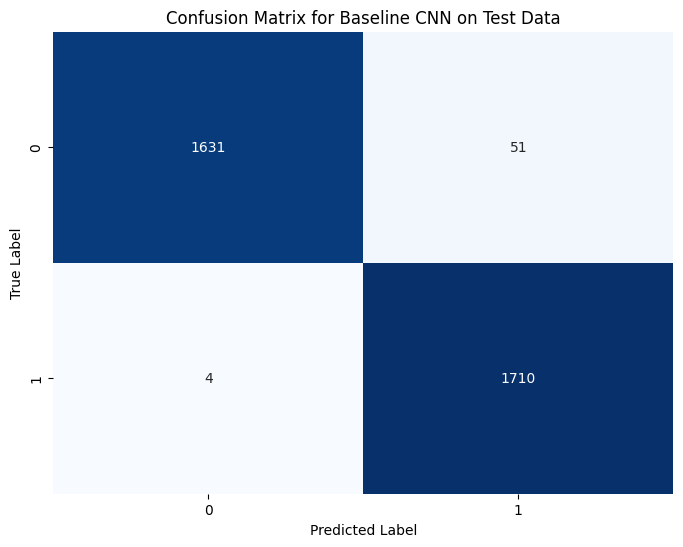

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_val_numpy)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_val_numpy, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Baseline CNN on Test Data')
plt.show()

### Simple Baseline Transfer Model

In [ ]:
IMG_SIZE = (244,122)
#32, 244, 122
IMG_SHAPE = IMG_SIZE + (3,) # Add a third dimension for RGB channel

base_model = keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMG_SHAPE,
    #pooling=max,
    classes=2,
    classifier_activation="sigmoid"
)
base_model.trainable = False


In [ ]:
inputs = keras.Input(shape=IMG_SHAPE) # Input layer

x = base_model(inputs) # EfficientNetB0
x = layers.GlobalAveragePooling2D()(x) # Pooling layer
x = layers.Dropout(0.1)(x) # Dropout layer

outputs = layers.Dense(2, activation= 'sigmoid')(x) # Classification layer

# Build the model
model = keras.Model(inputs, outputs)

In [ ]:
# Specify metrics, loss function, and optimizer
metrics =[keras.metrics.CategoricalAccuracy(), keras.metrics.FalsePositives(),
            keras.metrics.TruePositives(), keras.metrics.FalseNegatives(),
            keras.metrics.TrueNegatives()]
loss = keras.losses.BinaryCrossentropy() #(from_logits=True)
optimizer = keras.optimizers.Adam

# Create learning rates for two phases of training
learning_rates = [1e-3, 1e-4]

In [ ]:
y_train_augment_onehot = to_categorical(y_train_augment)
y_val_numpy_onehot = to_categorical(y_val_numpy)
y_test_numpy_onehot = to_categorical(y_test_numpy)

In [ ]:
# Compile the model
model.compile(
    optimizer=optimizer(learning_rates[0]),
    loss=loss,
    metrics=metrics,
)

# Train the model
phase_1_history = model.fit(
    x = X_train_augment,
    y = y_train_augment_onehot,
    epochs=1,
    validation_data=(X_val_numpy, y_val_numpy_onehot)
)

375/375 [==============================] - 40s 64ms/step - loss: 0.5608 - categorical_accuracy: 0.7258 - false_positives_1: 3393.0000 - true_positives_1: 8606.0000 - false_negatives_1: 3394.0000 - true_negatives_1: 8607.0000 - val_loss: 0.4831 - val_categorical_accuracy: 0.7948 - val_false_positives_1: 740.0000 - val_true_positives_1: 2724.0000 - val_false_negatives_1: 672.0000 - val_true_negatives_1: 2656.0000


In [ ]:
# Phase 2: Fine tuning
base_model.trainable = True

# We only update parameters from layer 221 onwards
fine_tune_at = 221
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False
# Since we've changed the attribute of the base model
# we need to compile the model again to capture this change.
model.compile(
    optimizer=optimizer(learning_rates[1]),
    loss=loss,
    metrics=metrics
)

# Train the model
phase_2_history = model.fit(
    x = X_train_augment,
    y = y_train_augment_onehot,
    epochs=1,
    initial_epoch=phase_1_history.epoch[-1],
    validation_data = (X_val_numpy, y_val_numpy_onehot)
)

375/375 [==============================] - 33s 60ms/step - loss: 0.3927 - categorical_accuracy: 0.8205 - false_positives_1: 2789.0000 - true_positives_1: 12622.0000 - false_negatives_1: 2774.0000 - true_negatives_1: 12607.0000 - val_loss: 0.3035 - val_categorical_accuracy: 0.8716 - val_false_positives_1: 441.0000 - val_true_positives_1: 2959.0000 - val_false_negatives_1: 437.0000 - val_true_negatives_1: 2955.0000


In [ ]:
predicts = model.predict(X_test_numpy)

107/107 [==============================] - 6s 35ms/step


In [ ]:
loss, accuracy, *_ = model.evaluate(X_test_numpy, y_test_numpy_onehot)

107/107 [==============================] - 5s 49ms/step - loss: 0.2984 - categorical_accuracy: 0.8790 - false_positives_1: 411.0000 - true_positives_1: 2977.0000 - false_negatives_1: 419.0000 - true_negatives_1: 2985.0000


### Advanced Transfer Model

In [ ]:
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the base VGG16 model, pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(244, 122, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the output of the base model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)  # We have 4 classes for this example

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model before any training
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on new data (freezing the convolutional VGG16 model)
history = model.fit(
    X_train_augment, y_train_augment_onehot,
    epochs=10,  # The number of epochs to train for
    validation_data=(X_val_numpy, y_val_numpy_onehot)
)

Epoch 1/10
375/375 [==============================] - 46s 108ms/step - loss: 0.6861 - accuracy: 0.8433 - val_loss: 0.2935 - val_accuracy: 0.9081
Epoch 2/10
375/375 [==============================] - 40s 107ms/step - loss: 0.1423 - accuracy: 0.9557 - val_loss: 0.2238 - val_accuracy: 0.9317
Epoch 3/10
375/375 [==============================] - 39s 103ms/step - loss: 0.0604 - accuracy: 0.9797 - val_loss: 0.2178 - val_accuracy: 0.9346
Epoch 4/10
375/375 [==============================] - 41s 108ms/step - loss: 0.0366 - accuracy: 0.9892 - val_loss: 0.1700 - val_accuracy: 0.9499
Epoch 5/10
375/375 [==============================] - 41s 108ms/step - loss: 0.0216 - accuracy: 0.9951 - val_loss: 0.2239 - val_accuracy: 0.9379
Epoch 6/10
375/375 [==============================] - 39s 104ms/step - loss: 0.0085 - accuracy: 0.9992 - val_loss: 0.1074 - val_accuracy: 0.9714
Epoch 7/10
375/375 [==============================] - 39s 104ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1100 - val_ac

In [ ]:
# After the initial training, you may want to set the later layers of the VGG16 model to be trainable for fine-tuning
for layer in base_model.layers[-8:]:  # This unfreezes the last 8 layers for fine-tuning
    layer.trainable = True

# Recompile the model for fine-tuning
# Use a lower learning rate to fine-tune the pre-trained layers
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Continue training the model for fine-tuning
# Note: You may need to use a smaller number of epochs and adjust the learning rate
fine_tune_history = model.fit(
    X_train_augment, y_train_augment_onehot,
    epochs=4,  # The number of epochs to fine-tune for
    validation_data=(X_val_numpy, y_val_numpy_onehot)
)

Epoch 1/4
375/375 [==============================] - 62s 154ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 0.1930 - val_accuracy: 0.9488
Epoch 2/4
375/375 [==============================] - 58s 154ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.1051 - val_accuracy: 0.9688
Epoch 3/4
375/375 [==============================] - 58s 155ms/step - loss: 0.0203 - accuracy: 0.9941 - val_loss: 0.1278 - val_accuracy: 0.9661
Epoch 4/4
375/375 [==============================] - 58s 156ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.1052 - val_accuracy: 0.9691


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_numpy, y_test_numpy_onehot)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

107/107 [==============================] - 8s 74ms/step - loss: 0.0970 - accuracy: 0.9714
Test Loss: 0.09702591598033905
Test Accuracy: 0.9714369773864746


In [ ]:
model_save_path = "/content/drive/My Drive/207_Project/Preprocessed_2D_Models/VGG16_advanced.h5"


# Save the model in the TensorFlow SavedModel format
model.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 8s 75ms/step
              precision    recall  f1-score   support

Non_Demented       0.99      0.95      0.97      1703
    Demented       0.95      0.99      0.97      1693

    accuracy                           0.97      3396
   macro avg       0.97      0.97      0.97      3396
weighted avg       0.97      0.97      0.97      3396



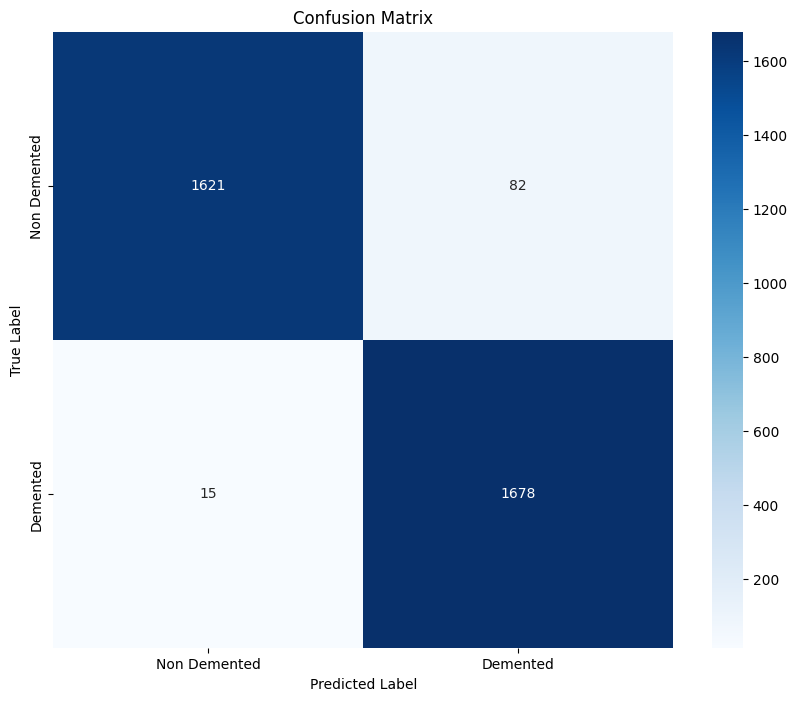

In [ ]:
# Generate predictions on the test set
y_pred_probs = model.predict(X_test_numpy)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_numpy_onehot, axis=1)  # Assuming y_test_oh is the one-hot encoded true labels

# Generate a classification report
class_report = classification_report(y_true, y_pred, target_names=['Non_Demented', 'Demented'])
print(class_report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non Demented', 'Demented'], yticklabels=['Non Demented', 'Demented'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()